# Code for generating Figures

**Not Intended to be Readable to others**... just for internal reference.

First import userful packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fig 5

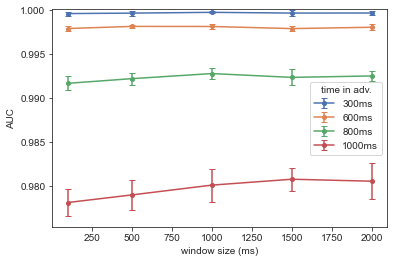

In [36]:
df = pd.read_csv("data/fig5.csv")
df = df.set_index("window")

sns.set_style("ticks")
sns.set_palette("deep")

for col in ("300ms", "600ms", "800ms", "1000ms"):
    plt.errorbar(df.index.tolist(), df[col].tolist(), yerr=df[col+"_std"],label=col.replace("p", "P@0.").replace("r", "R"), marker="o", markersize=4, capsize=3)
plt.legend(title="time in adv.")
plt.ylabel("AUC")
plt.xlabel("window size (ms)")
plt.ylim(top=1.0001)
# g = sns.FacetGrid(df, size=5)
# g.map(plt.errorbar, "x", "y", "std", marker="o")
plt.savefig("fig5.pdf")

# errorbar and marker in jupyter might seem off, but alright when saved as pdf
plt.show()

# Fig 6

In [29]:
df = pd.read_csv("data/fig6.csv")

In [30]:
df = df.set_index("timeahead")

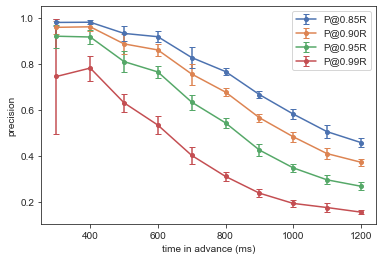

In [31]:
sns.set_style("ticks")
sns.set_palette("deep")

for col in ("p85r", "p90r", "p95r", "p99r"):
    plt.errorbar(df.index.tolist(), df[col].tolist(), yerr=df[col+"_std"],label=col.replace("p", "P@0.").replace("r", "R"), marker="o", markersize=4, capsize=3)
plt.legend()
plt.ylabel("precision")
plt.xlabel("time in advance (ms)")
plt.ylim(top=1.05)
# g = sns.FacetGrid(df, size=5)
# g.map(plt.errorbar, "x", "y", "std", marker="o")
plt.savefig("fig6.pdf")

# errorbar and marker in jupyter might seem off, but alright when saved as pdf
plt.show()

# Supplementary Fig 2

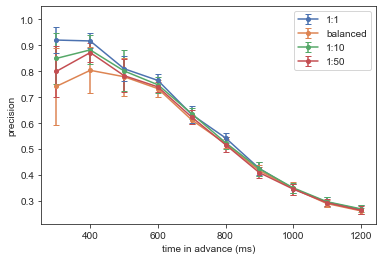

In [3]:
df = pd.read_csv("data/supp_fig2.csv")
df = df.set_index("timeahead")
sns.set_style("ticks")
sns.set_palette("deep")

for col in ("1:1", "balanced", "1:10", "1:50"):
    plt.errorbar(df.index.tolist(), df[col].tolist(), yerr=df[col+"_std"],label=col.replace("p", "P@0.").replace("r", "R"), marker="o", markersize=4, capsize=3)
plt.legend()
plt.ylabel("precision")
plt.xlabel("time in advance (ms)")
plt.ylim(top=1.05)
# g = sns.FacetGrid(df, size=5)
# g.map(plt.errorbar, "x", "y", "std", marker="o")
plt.savefig("supp_fig2.pdf")

# errorbar and marker in jupyter might seem off, but alright when saved as pdf
plt.show()

# Figures after setting window and time-in-advance

In [37]:
!ls

107heldoutPred_expID623_7.465988397598267DecThresh_FalsePreds_1000.0win_800.0trainahead_0testahead.csv
107heldoutPred_expID623_7.465988397598267DecThresh_TruePreds_1000.0win_800.0trainahead_0testahead.csv
623Analysis_Graphs
model_data
notebook.ipynb


In [38]:
csv95 = "107heldoutPred_expID623_7.465988397598267DecThresh_FalsePreds_1000.0win_800.0trainahead_0testahead.csv"
# csv85 = "P@85R_0.73prec_800ahead_1000win_exp262.csv"
# csv90 = "P@90R_0.63prec_800ahead_1000win_exp262.csv"
# csv99 = "P@99R_0.28prec_800ahead_1000win_exp262.csv"
# # stats below retrieved from heldout_pred_res.csv on HPCC
# tn_num = {85: 50385, 90: 49855, 95: 48763, 99: 44999}
# tp_num = {85: 2040, 90: 2160, 95: 2280, 99: 2376}



FALSE_CAT_COL = "false_pred_category"

false_df = pd.read_csv(csv95)

false_df.head(5)

,velocity_InTrain,velocity_cal,position_InTrain,joystick_InTrain,destabilizing_InTrain,trial_key,person,start_seconds,end_seconds,label,...,lookahead_avg_destab_mag_ico,lookahead_avg_destab_mag_eco,lookahead_total_destab_steps_ico,lookahead_total_destab_steps_eco,lookahead_destab_sustained_ico,lookahead_destab_sustained_eco,lookahead_vel,lookahead_pos,lookahead_joy,lookahead_times
0,"[-13.260807000000002, -13.713606918367347, -14...","[-9.829872532891914, -9.684613169169157, -10.3...","[-4.04296875, -4.237920021524235, -4.446573629...","[0.007935, 0.007935, 0.007935, 0.007935, 0.007...","[False, False, False, False, False, False, Fal...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,99.867,100.854,1,...,0.179718,0.015656,16,1,0.286,0.000,[ -31.499782 -31.199375 -34.418018 -34.1605...,[-21.99188232 -22.4697876 -22.96691895 -23.43...,[-8.59680e-02 -1.01593e-01 -1.32843e-01 -1.562...,[100.854 100.875 100.895 100.915 100.936 100.9...
1,"[6.673319, 7.529687781954905, 8.17473915714288...","[9.475708007812704, 8.38370525086892, 8.783331...","[9.6624755859375, 9.832536510955128, 10.010722...","[0.031738, 0.031738, 0.031738, 0.031738, 0.031...","[True, True, True, True, True, True, True, Tru...",1_af_P26/10_600back_Block3_trial_010.csv,1_af_P26,10.318,11.312,1,...,0.038284,NaN,40,0,0.768,0.000,[ 21.25377 23.034752 22.444668 25.073226 ...,[21.42883301 21.78039551 22.17315674 22.546691...,[0.158722 0.126953 0.119019 0.111084 0.103149 ...,[11.312 11.333 11.352 11.373 11.393 11.414 11....
2,"[-4.248608, -5.234902128942405, -4.21304940000...","[-6.931849888399654, -6.068349415958236, -6.79...","[-46.9912719726563, -47.112468089597385, -47.2...","[-0.4923399999999999, -0.4994102977736543, -0....","[True, True, True, True, True, True, True, Tru...",1_ak_P6/08_600back_Block2_trial_008.csv,1_ak_P6/,76.159,77.150,1,...,0.337364,0.337364,27,27,0.538,0.538,[ 18.807601 21.538083 19.993135 22.299829 ...,[-49.07043457 -48.82873535 -48.58978271 -48.33...,[-0.584656 -0.538483 -0.446198 -0.376953 -0.24...,[77.15 77.171 77.19 77.211 77.233 77.253 77....
3,"[24.349031, 25.944289315398894, 26.11212872170...","[7.240988991477778, 9.897145518848273, 10.6783...","[-29.528503417968803, -29.328120130776075, -29...","[-0.415405, -0.392334, -0.392334, -0.364890349...","[False, False, False, False, False, False, Fal...",1_ak_P6/20_600back_Block5_trial_020.csv,1_ak_P6/,18.981,19.973,1,...,0.418897,0.713875,31,15,0.598,0.283,[-46.691775 -46.691775 -46.090962 -45.74764 -...,[-21.88201904 -22.50274658 -23.15093994 -23.85...,[-0.253876 -0.292358 -0.292358 -0.292358 -0.26...,[19.973 19.993 20.014 20.034 20.055 20.077 20....
4,"[-5.278574, -5.432877811688317, -5.55294436920...","[-3.707885742187579, -3.517109701536256, -3.89...","[-1.790771484375, -1.8598997438108786, -1.9377...","[-0.007843, -0.0008208961038958882, -3.1e-05, ...","[True, True, True, True, True, True, True, Tru...",1_am_P15/01_600back_Block1_trial_001.csv,1_am_P15,19.946,20.915,1,...,0.067892,0.067892,9,9,0.154,0.154,[ 64.598157 68.610731 71.121272 73.824932 ...,[-3.50738525 -2.75482178 -1.92260742 -1.051940...,[-3.59406e-01 -2.89093e-01 -2.03156e-01 -1.640...,[20.915 20.937 20.958 20.978 20.998 21.02 21....


In [39]:
def get_fp_fn(path: str):
    """split predictions into positive and negatives, works for both false and true"""
    false_df = pd.read_csv(path)
    
    grouped = false_df.groupby("predicted")
    fp = grouped.get_group(1)
    fn = grouped.get_group(0)
    return fp, fn

def print_A_percentage(path: str):
    print(f"now analyzing {path}...")
    
    fp, fn = get_fp_fn(path)

    fn_A_count = fn[FALSE_CAT_COL].value_counts()["A"]
    print(f"false neg A: {fn_A_count} ({fn_A_count/len(fn):.2%})")
    fp_A_count = fp[FALSE_CAT_COL].value_counts()["A"]
    print(f"false pos A: {fp_A_count} ({fp_A_count/len(fp):.2%})")

### True DataFrames

In [40]:
# true99 = "65heldoutPred_expID262_0.6764978170394897DecThresh_TruePreds_1000.0win_800.0trainahead_0testahead.csv"
# true85 = "66heldoutPred_expID262_22.51037061214447DecThresh_TruePreds_1000.0win_800.0trainahead_0testahead.csv"
# true90 = "67heldoutPred_expID262_12.994632124900818DecThresh_TruePreds_1000.0win_800.0trainahead_0testahead.csv"
true95 = "107heldoutPred_expID623_7.465988397598267DecThresh_TruePreds_1000.0win_800.0trainahead_0testahead.csv"

true_df = pd.read_csv(true95)
true_df.head()

,velocity_InTrain,velocity_cal,position_InTrain,joystick_InTrain,destabilizing_InTrain,trial_key,person,start_seconds,end_seconds,label,...,lookahead_avg_destab_mag_ico,lookahead_avg_destab_mag_eco,lookahead_total_destab_steps_ico,lookahead_total_destab_steps_eco,lookahead_destab_sustained_ico,lookahead_destab_sustained_eco,lookahead_vel,lookahead_pos,lookahead_joy,lookahead_times
0,"[-9.441352, -9.972683428571488, -10.213826, -1...","[-6.1471121651783385, -6.769919882016214, -8.2...","[-2.6202392578125, -2.756260463169658, -2.9196...","[0.007935, 0.007935, 0.007935, 0.007935, 0.007...","[False, False, False, False, False, False, Fal...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,16.855,17.835,1,...,0.072948,0.104197,30,21,0.576,0.405,[ -39.653677 -42.014014 -44.03103 -46.4771...,[-20.73669434 -21.35742188 -22.01934814 -22.76...,[-3.10000e-05 -3.10000e-05 -3.10000e-05 -3.100...,[17.835 17.855 17.877 17.899 17.921 17.943 17....
1,"[-13.947451, -14.48862857235618, -15.029806946...","[-9.024483816965471, -10.341788315988751, -10....","[-4.29840087890625, -4.506213695971984, -4.720...","[0.007935, 0.007935, 0.007935, 0.007935, 0.007...","[False, False, False, False, False, False, Fal...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,17.055,18.026,1,...,0.104197,0.104197,21,21,0.405,0.405,[ -62.999564 -66.432783 -68.449799 -72.2048...,[-27.81738281 -28.73199463 -29.68231201 -30.78...,[-3.10000e-05 0.00000e+00 -7.84300e-03 -7.843...,[18.026 18.046 18.068 18.088 18.11 18.132 18....
2,"[-21.028465, -21.834379445268958, -22.64614625...","[-13.857754794035058, -17.110603104213844, -14...","[-6.9378662109375, -7.276735323479513, -7.5686...","[0.0, -1.150278293133467e-06, -2.9073283858994...","[False, True, True, True, True, True, True, Tr...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,17.266,18.237,1,...,0.113963,NaN,12,0,0.215,0.000,[ -91.774229 -95.443481 -96.473447 -99.9066...,[-39.49310303 -40.98175049 -42.56652832 -44.16...,[-2.03156e-01 -2.03156e-01 -2.03156e-01 -2.031...,[18.237 18.258 18.28 18.301 18.323 18.343 18....
3,"[-29.311105, -30.630616820408274, -31.35912483...","[-21.05712890624564, -22.373806700417557, -23....","[-10.3765869140625, -10.820625149473939, -11.2...","[-0.023468, -0.06996034693877935, -0.101082795...","[True, True, True, True, True, True, True, Tru...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,17.452,18.424,1,...,0.000031,NaN,3,0,0.027,0.000,[-117.051302 -122.522994 -127.458246 -129.303601],[-54.48120117 -56.51916504 -58.49945068 -59.11...,[-3.1e-05 -3.1e-05 -3.1e-05 -3.1e-05],[18.424 18.446 18.465 18.473]
4,"[-19.569347, -20.271596090908773, -20.99232584...","[-14.125279017856608, -14.449550804314303, -16...","[-6.470947265625, -6.76058682528396, -7.093987...","[-3.1e-05, -3.1e-05, -3.1e-05, -3.1e-05, -0.00...","[True, True, True, True, True, True, True, Tru...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,100.076,101.056,1,...,0.126333,0.015656,6,1,0.083,0.000,[ -38.709541 -37.851237 -39.138694 -39.4391...,[-27.53448486 -28.18817139 -28.9050293 -29.56...,[-2.57843e-01 -2.50031e-01 -2.26593e-01 -1.719...,[101.056 101.078 101.098 101.119 101.139 101.1...


## Histogram
now for P@95R.

>So, you can create a histogram.  On the x-axis will be the different values, for example 0-10, 11-20, 21-30, 31-40, 41-50, 51+.  And then on the y-axis you will have the number of false positive (or false negative) windows fall within that criteria. One option would be to do just max (abs(pos)) and then also for velocity.


### Get the False numbers ready

In [41]:
fp, fn = get_fp_fn(csv95)

len(fp), len(fn)

(2253, 120)

In [42]:
def print_bins(fn, fp):
    fn_vel_bins = pd.cut(fn["max_abs_vel"], [0, 10, 20, 30, 40, 50, 200])
    fn_pos_bins = pd.cut(fn["max_abs_pos"], [0, 10, 20, 30, 40, 50, 200])
    fp_vel_bins = pd.cut(fp["max_abs_vel"], [0, 10, 20, 30, 40, 50, 200])
    fp_pos_bins = pd.cut(fp["max_abs_pos"], [0, 10, 20, 30, 40, 50, 200])
    display(fn_vel_bins.value_counts())
    display(fn_pos_bins.value_counts())
    display(fp_vel_bins.value_counts())
    display(fp_pos_bins.value_counts())
    
def append_max_abs_columns(fn, fp):
    fn["max_abs_vel"] = fn.velocity_InTrain.apply(lambda list_str: max([abs(v) for v in eval(list_str)]))
    fn["max_abs_pos"] = fn.position_InTrain.apply(lambda list_str: max([abs(v) for v in eval(list_str)]))
    fp["max_abs_vel"] = fp.velocity_InTrain.apply(lambda list_str: max([abs(v) for v in eval(list_str)]))
    fp["max_abs_pos"] = fp.position_InTrain.apply(lambda list_str: max([abs(v) for v in eval(list_str)]))
    
    print("now printing bins for appended columns...")
    print_bins(fn, fp)
    
    return fn, fp

In [43]:
fn, fp = append_max_abs_columns(fn, fp)

now printing bins for appended columns...


(50, 200]    71
(30, 40]     22
(20, 30]     11
(10, 20]      8
(40, 50]      8
(0, 10]       0
Name: max_abs_vel, dtype: int64

(50, 200]    27
(40, 50]     22
(10, 20]     20
(30, 40]     20
(20, 30]     18
(0, 10]      13
Name: max_abs_pos, dtype: int64

(50, 200]    1471
(40, 50]      348
(30, 40]      207
(20, 30]      138
(10, 20]       78
(0, 10]        11
Name: max_abs_vel, dtype: int64

(40, 50]     591
(50, 200]    587
(30, 40]     464
(20, 30]     333
(10, 20]     233
(0, 10]       45
Name: max_abs_pos, dtype: int64

### Get True Numbers Ready (the same way?)

In [44]:
tp, tn = get_fp_fn(true95)
tn, tp = append_max_abs_columns(tn, tp)


now printing bins for appended columns...


(50, 200]    11908
(10, 20]      9788
(0, 10]       8603
(20, 30]      7919
(30, 40]      6118
(40, 50]      4533
Name: max_abs_vel, dtype: int64

(0, 10]      16353
(10, 20]     12606
(20, 30]      9259
(30, 40]      5687
(40, 50]      3488
(50, 200]     1476
Name: max_abs_pos, dtype: int64

(50, 200]    1809
(40, 50]      174
(30, 40]      122
(20, 30]      105
(10, 20]       63
(0, 10]         7
Name: max_abs_vel, dtype: int64

(50, 200]    965
(40, 50]     666
(30, 40]     333
(20, 30]     206
(10, 20]      95
(0, 10]       15
Name: max_abs_pos, dtype: int64

In [45]:
tp.head()

,velocity_InTrain,velocity_cal,position_InTrain,joystick_InTrain,destabilizing_InTrain,trial_key,person,start_seconds,end_seconds,label,...,lookahead_total_destab_steps_ico,lookahead_total_destab_steps_eco,lookahead_destab_sustained_ico,lookahead_destab_sustained_eco,lookahead_vel,lookahead_pos,lookahead_joy,lookahead_times,max_abs_vel,max_abs_pos
0,"[-9.441352, -9.972683428571488, -10.213826, -1...","[-6.1471121651783385, -6.769919882016214, -8.2...","[-2.6202392578125, -2.756260463169658, -2.9196...","[0.007935, 0.007935, 0.007935, 0.007935, 0.007...","[False, False, False, False, False, False, Fal...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,16.855,17.835,1,...,30,21,0.576,0.405,[ -39.653677 -42.014014 -44.03103 -46.4771...,[-20.73669434 -21.35742188 -22.01934814 -22.76...,[-3.10000e-05 -3.10000e-05 -3.10000e-05 -3.100...,[17.835 17.855 17.877 17.899 17.921 17.943 17....,39.653677,20.736694
1,"[-13.947451, -14.48862857235618, -15.029806946...","[-9.024483816965471, -10.341788315988751, -10....","[-4.29840087890625, -4.506213695971984, -4.720...","[0.007935, 0.007935, 0.007935, 0.007935, 0.007...","[False, False, False, False, False, False, Fal...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,17.055,18.026,1,...,21,21,0.405,0.405,[ -62.999564 -66.432783 -68.449799 -72.2048...,[-27.81738281 -28.73199463 -29.68231201 -30.78...,[-3.10000e-05 0.00000e+00 -7.84300e-03 -7.843...,[18.026 18.046 18.068 18.088 18.11 18.132 18....,62.999564,27.817383
2,"[-21.028465, -21.834379445268958, -22.64614625...","[-13.857754794035058, -17.110603104213844, -14...","[-6.9378662109375, -7.276735323479513, -7.5686...","[0.0, -1.150278293133467e-06, -2.9073283858994...","[False, True, True, True, True, True, True, Tr...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,17.266,18.237,1,...,12,0,0.215,0.000,[ -91.774229 -95.443481 -96.473447 -99.9066...,[-39.49310303 -40.98175049 -42.56652832 -44.16...,[-2.03156e-01 -2.03156e-01 -2.03156e-01 -2.031...,[18.237 18.258 18.28 18.301 18.323 18.343 18....,91.774229,39.493103
3,"[-29.311105, -30.630616820408274, -31.35912483...","[-21.05712890624564, -22.373806700417557, -23....","[-10.3765869140625, -10.820625149473939, -11.2...","[-0.023468, -0.06996034693877935, -0.101082795...","[True, True, True, True, True, True, True, Tru...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,17.452,18.424,1,...,3,0,0.027,0.000,[-117.051302 -122.522994 -127.458246 -129.303601],[-54.48120117 -56.51916504 -58.49945068 -59.11...,[-3.1e-05 -3.1e-05 -3.1e-05 -3.1e-05],[18.424 18.446 18.465 18.473],117.051302,54.481201
4,"[-19.569347, -20.271596090908773, -20.99232584...","[-14.125279017856608, -14.449550804314303, -16...","[-6.470947265625, -6.76058682528396, -7.093987...","[-3.1e-05, -3.1e-05, -3.1e-05, -3.1e-05, -0.00...","[True, True, True, True, True, True, True, Tru...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,100.076,101.056,1,...,6,1,0.083,0.000,[ -38.709541 -37.851237 -39.138694 -39.4391...,[-27.53448486 -28.18817139 -28.9050293 -29.56...,[-2.57843e-01 -2.50031e-01 -2.26593e-01 -1.719...,[101.056 101.078 101.098 101.119 101.139 101.1...,38.709541,27.534485


### make the plot
https://stackoverflow.com/questions/26218704/matplotlib-histogram-with-collection-bin-for-high-values

back to back bar plot: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

First, position for P@95R

In [46]:
false_path = csv95
true_path = true95

In [47]:
# get df's
fp, fn = get_fp_fn(false_path)
fn, fp = append_max_abs_columns(fn, fp)
tp, tn = get_fp_fn(true_path)
tn, tp = append_max_abs_columns(tn, tp)

now printing bins for appended columns...


(50, 200]    71
(30, 40]     22
(20, 30]     11
(10, 20]      8
(40, 50]      8
(0, 10]       0
Name: max_abs_vel, dtype: int64

(50, 200]    27
(40, 50]     22
(10, 20]     20
(30, 40]     20
(20, 30]     18
(0, 10]      13
Name: max_abs_pos, dtype: int64

(50, 200]    1471
(40, 50]      348
(30, 40]      207
(20, 30]      138
(10, 20]       78
(0, 10]        11
Name: max_abs_vel, dtype: int64

(40, 50]     591
(50, 200]    587
(30, 40]     464
(20, 30]     333
(10, 20]     233
(0, 10]       45
Name: max_abs_pos, dtype: int64

now printing bins for appended columns...


(50, 200]    11908
(10, 20]      9788
(0, 10]       8603
(20, 30]      7919
(30, 40]      6118
(40, 50]      4533
Name: max_abs_vel, dtype: int64

(0, 10]      16353
(10, 20]     12606
(20, 30]      9259
(30, 40]      5687
(40, 50]      3488
(50, 200]     1476
Name: max_abs_pos, dtype: int64

(50, 200]    1809
(40, 50]      174
(30, 40]      122
(20, 30]      105
(10, 20]       63
(0, 10]         7
Name: max_abs_vel, dtype: int64

(50, 200]    965
(40, 50]     666
(30, 40]     333
(20, 30]     206
(10, 20]      95
(0, 10]       15
Name: max_abs_pos, dtype: int64

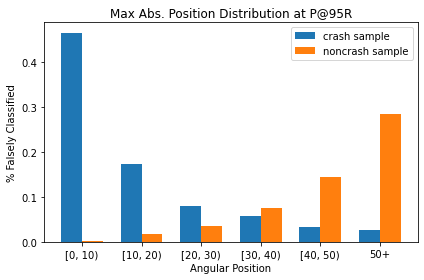

In [79]:
import matplotlib.pyplot as plt
recall_threshold = 95

bins = np.arange(0, 70, 10)
x_labels = ["[0, 10)", "[10, 20)", "[20, 30)", "[30, 40)", "[40, 50)", "50+"]

fn_bin, _ = np.histogram(np.clip(fn["max_abs_pos"], bins[0], bins[-1]), bins=bins)
fp_bin, _ = np.histogram(np.clip(fp["max_abs_pos"], bins[0], bins[-1]), bins=bins)
tn_bin, _ = np.histogram(np.clip(tn["max_abs_pos"], bins[0], bins[-1]), bins=bins)
tp_bin, _ = np.histogram(np.clip(tp["max_abs_pos"], bins[0], bins[-1]), bins=bins)

# normalize fn count by fn + tp (positive samples)
fn_bin_norm = fn_bin / (fn_bin + tp_bin)
# normalize fp count by fp + tn (negative samples)
fp_bin_norm = fp_bin / (fp_bin + tn_bin)

# plot time! 
x = np.arange(len(x_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fn_bin_norm, width, label='crash sample')
rects2 = ax.bar(x + width/2, fp_bin_norm, width, label='noncrash sample')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Falsely Classified')
ax.set_xlabel('Angular Position')
ax.set_title(f'Max Abs. Position Distribution at P@{recall_threshold}R')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig("fig7.pdf")
plt.show()

In [49]:
display(fn_bin) # missed crashes
display(fp_bin) # false alerts

array([13, 20, 18, 20, 22, 27])

array([ 45, 233, 333, 464, 591, 587])

#### Interpretation for Position Plot Above
* Positive samples with lower max abs. position tend to be more likely to be misclassified as "no crash". 
* Negative samples with higher max abs. position tend to be more likely to be misclassified as "crash". 

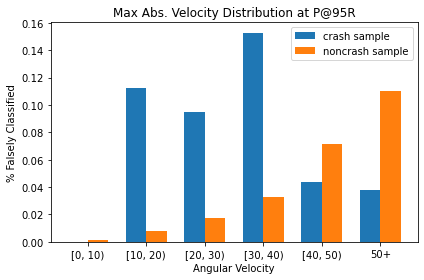

In [50]:
recall_threshold = 95

bins = np.arange(0, 70, 10)
x_labels = ["[0, 10)", "[10, 20)", "[20, 30)", "[30, 40)", "[40, 50)", "50+"]

fn_bin, _ = np.histogram(np.clip(fn["max_abs_vel"], bins[0], bins[-1]), bins=bins)
fp_bin, _ = np.histogram(np.clip(fp["max_abs_vel"], bins[0], bins[-1]), bins=bins)
tn_bin, _ = np.histogram(np.clip(tn["max_abs_vel"], bins[0], bins[-1]), bins=bins)
tp_bin, _ = np.histogram(np.clip(tp["max_abs_vel"], bins[0], bins[-1]), bins=bins)

# normalize fn count by fn + tp (positive samples)
fn_bin_norm = fn_bin / (fn_bin + tp_bin)
# normalize fp count by fp + tn (negative samples)
fp_bin_norm = fp_bin / (fp_bin + tn_bin)

# plot time! 
x = np.arange(len(x_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fn_bin_norm, width, label='crash sample')
rects2 = ax.bar(x + width/2, fp_bin_norm, width, label='noncrash sample')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Falsely Classified')
ax.set_xlabel('Angular Velocity')
ax.set_title(f'Max Abs. Velocity Distribution at P@{recall_threshold}R')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [51]:
display(fn_bin) # missed crashes
display(fn_bin + tp_bin) # positive samples
display(fp_bin) # false alerts

array([ 0,  8, 11, 22,  8, 71])

array([   7,   71,  116,  144,  182, 1880])

array([  11,   78,  138,  207,  348, 1471])

#### Interpretation for Velocity Plot Above
* Much less trend, but positive samples with lower max abs. position tend to be more likely to be misclassified as "no crash". 
* Negative samples with higher max abs. position tend to be more likely to be misclassified as "crash". 

## savable samples at 400ms

In [52]:
tp

,velocity_InTrain,velocity_cal,position_InTrain,joystick_InTrain,destabilizing_InTrain,trial_key,person,start_seconds,end_seconds,label,...,lookahead_total_destab_steps_ico,lookahead_total_destab_steps_eco,lookahead_destab_sustained_ico,lookahead_destab_sustained_eco,lookahead_vel,lookahead_pos,lookahead_joy,lookahead_times,max_abs_vel,max_abs_pos
0,"[-9.441352, -9.972683428571488, -10.213826, -1...","[-6.1471121651783385, -6.769919882016214, -8.2...","[-2.6202392578125, -2.756260463169658, -2.9196...","[0.007935, 0.007935, 0.007935, 0.007935, 0.007...","[False, False, False, False, False, False, Fal...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,16.855,17.835,1,...,30,21,0.576,0.405,[ -39.653677 -42.014014 -44.03103 -46.4771...,[-20.73669434 -21.35742188 -22.01934814 -22.76...,[-3.10000e-05 -3.10000e-05 -3.10000e-05 -3.100...,[17.835 17.855 17.877 17.899 17.921 17.943 17....,39.653677,20.736694
1,"[-13.947451, -14.48862857235618, -15.029806946...","[-9.024483816965471, -10.341788315988751, -10....","[-4.29840087890625, -4.506213695971984, -4.720...","[0.007935, 0.007935, 0.007935, 0.007935, 0.007...","[False, False, False, False, False, False, Fal...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,17.055,18.026,1,...,21,21,0.405,0.405,[ -62.999564 -66.432783 -68.449799 -72.2048...,[-27.81738281 -28.73199463 -29.68231201 -30.78...,[-3.10000e-05 0.00000e+00 -7.84300e-03 -7.843...,[18.026 18.046 18.068 18.088 18.11 18.132 18....,62.999564,27.817383
2,"[-21.028465, -21.834379445268958, -22.64614625...","[-13.857754794035058, -17.110603104213844, -14...","[-6.9378662109375, -7.276735323479513, -7.5686...","[0.0, -1.150278293133467e-06, -2.9073283858994...","[False, True, True, True, True, True, True, Tr...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,17.266,18.237,1,...,12,0,0.215,0.000,[ -91.774229 -95.443481 -96.473447 -99.9066...,[-39.49310303 -40.98175049 -42.56652832 -44.16...,[-2.03156e-01 -2.03156e-01 -2.03156e-01 -2.031...,[18.237 18.258 18.28 18.301 18.323 18.343 18....,91.774229,39.493103
3,"[-29.311105, -30.630616820408274, -31.35912483...","[-21.05712890624564, -22.373806700417557, -23....","[-10.3765869140625, -10.820625149473939, -11.2...","[-0.023468, -0.06996034693877935, -0.101082795...","[True, True, True, True, True, True, True, Tru...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,17.452,18.424,1,...,3,0,0.027,0.000,[-117.051302 -122.522994 -127.458246 -129.303601],[-54.48120117 -56.51916504 -58.49945068 -59.11...,[-3.1e-05 -3.1e-05 -3.1e-05 -3.1e-05],[18.424 18.446 18.465 18.473],117.051302,54.481201
4,"[-19.569347, -20.271596090908773, -20.99232584...","[-14.125279017856608, -14.449550804314303, -16...","[-6.470947265625, -6.76058682528396, -7.093987...","[-3.1e-05, -3.1e-05, -3.1e-05, -3.1e-05, -0.00...","[True, True, True, True, True, True, True, Tru...",1_af_P26/01_600back_Block1_trial_001.csv,1_af_P26,100.076,101.056,1,...,6,1,0.083,0.000,[ -38.709541 -37.851237 -39.138694 -39.4391...,[-27.53448486 -28.18817139 -28.9050293 -29.56...,[-2.57843e-01 -2.50031e-01 -2.26593e-01 -1.719...,[101.056 101.078 101.098 101.119 101.139 101.1...,38.709541,27.534485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,"[-32.787239, -32.48808886335402, -31.820814058...","[-40.021623883927056, -36.2608710506786, -42.3...","[-18.69873046875, -19.41429916693247, -20.2635...","[-0.273468, -0.273468, -0.273468, -0.273468, -...","[True, True, True, True, True, True, True, Tru...",2_xz_P11/19_600back_Block5_trial_019.csv,2_xz_P11,78.414,79.396,1,...,19,0,0.367,0.000,[-27.894902 -28.066563 -27.809072 -28.839037 -...,[-49.21875 -49.75158691 -50.34759521 -50.95...,[-0.484406 -0.492218 -0.507843 -0.515656 -0.52...,[79.396 79.418 79.44 79.462 79.484 79.504 79....,32.787239,49.218750
2276,"[-30.598562, -30.44202882467528, -30.612074457...","[-34.706809303968484, -34.592966744675884, -34...","[-25.8453369140625, -26.539093470529444, -27.2...","[-0.304718, -0.311842470315401, -

In [53]:
def find_closest_vel_pos_in_row(row, offset=0.4):
    times = np.fromstring(row["lookahead_times"][1:-1], sep=" ")
    vels = np.fromstring(row["lookahead_vel"][1:-1], sep=" ")
    pos = np.fromstring(row["lookahead_pos"][1:-1], sep=" ")
    # print(times, vels, pos)
    time_pos = np.abs((times - (times[0] + offset))).argmin()
    return vels[time_pos], pos[time_pos]


def savable_vel(pos):
    """velocity as a function of position, below 0"""
    if pos < 0:
        return 0.0369 * pos ** 2 + 0.4947 * pos -134.49
    elif pos > 0:
        return -0.0077 * pos ** 2-1.5192 * pos+175.66
    else:
        raise ValueError("position is 0! Not yet defined.")


def is_savable(pos, vel, left_bound, right_bound):
    best_savable_vel = savable_vel(pos)
    if pos < 0:
        if vel < best_savable_vel:
            return False
    else:
        if vel > best_savable_vel:
            return False
    return True

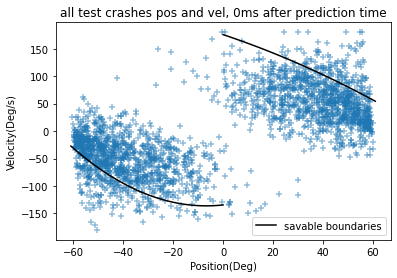

TypeError: is_savable() missing 2 required positional arguments: 'left_bound' and 'right_bound'

In [54]:


for OFFSET in (0, 0.2, 0.4, 0.6, 0.8):
    vel_row_tup = pd.concat([fn, tp]).apply(lambda row: find_closest_vel_pos_in_row(row, offset=OFFSET), axis=1).to_list()
    vels, pos = zip(*vel_row_tup)
    import matplotlib.pyplot as plt
    to_vel = np.vectorize(savable_vel)
    lin_x1 = np.linspace(-61, -0.001)
    lin_y1 = to_vel(lin_x1)
    lin_x2 = np.linspace(0.001, 61)
    lin_y2 = to_vel(lin_x2)

    plt.plot(lin_x1, lin_y1, 'k-')
    plt.plot(lin_x2, lin_y2, 'k-', label="savable boundaries")

    plt.scatter(pos, vels, marker="+", alpha=0.5)
    plt.xlabel("Position(Deg)")
    plt.ylabel("Velocity(Deg/s)")
    plt.title(f"all test crashes pos and vel, {OFFSET*1000}ms after prediction time")
    plt.legend(loc="lower right")
    plt.show()

    total_savables = sum([is_savable(pos, vel) for vel, pos in vel_row_tup])
    print(f"Total savable TP: {total_savables/len(vel_row_tup)} ({total_savables}/{len(vel_row_tup)})")

## Correct Boundary
Find the X boundary that can rule all crashes as unsavable in 800ms after prediction

Graph (only table % needs to be changed)
1. Calculate the boundary (X -58 or +58)
2. anything outside this X boundary is NOT SAVABLE

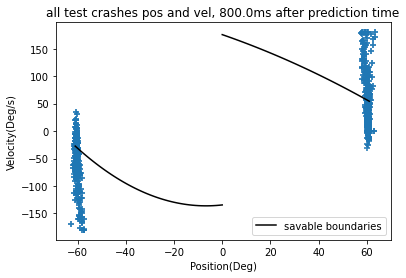

TypeError: is_savable() missing 2 required positional arguments: 'left_bound' and 'right_bound'

In [55]:
OFFSET = 0.8
vel_row_tup = pd.concat([fn, tp]).apply(lambda row: find_closest_vel_pos_in_row(row, offset=OFFSET), axis=1).to_list()
vels, pos = zip(*vel_row_tup)
import matplotlib.pyplot as plt
to_vel = np.vectorize(savable_vel)
lin_x1 = np.linspace(-61, -0.001)
lin_y1 = to_vel(lin_x1)
lin_x2 = np.linspace(0.001, 61)
lin_y2 = to_vel(lin_x2)

plt.plot(lin_x1, lin_y1, 'k-')
plt.plot(lin_x2, lin_y2, 'k-', label="savable boundaries")

plt.scatter(pos, vels, marker="+", alpha=0.5)
plt.xlabel("Position(Deg)")
plt.ylabel("Velocity(Deg/s)")
plt.title(f"all test crashes pos and vel, {OFFSET*1000}ms after prediction time")
plt.legend(loc="lower right")
plt.show()

total_savables = sum([is_savable(pos, vel) for vel, pos in vel_row_tup])
print(f"Total savable TP: {total_savables/len(vel_row_tup)} ({total_savables}/{len(vel_row_tup)})")

In [56]:
pos_below_zero = [p for p in pos if p < 0]
pos_above_zero = [p for p in pos if p > 0]

In [57]:
max(pos_below_zero), min(pos_above_zero)

(-57.23876953, 57.5491333)

#### Modified Version of Savable Prediction
Follows the results from the previous section

In [67]:
def savable_vel(pos, left_bound=max(pos_below_zero), right_bound=min(pos_above_zero)):
    """velocity as a function of position, below 0"""
    # if pos out of given bounds, unsavable at all, return inf
    if pos < left_bound:
        return -np.inf
    if pos > right_bound:
        return np.inf

    if pos < 0:
        return 0.0369 * pos ** 2 + 0.4947 * pos -134.49
    elif pos > 0:
        return -0.0077 * pos ** 2-1.5192 * pos+175.66
    else:
        raise ValueError("position is 0! Not yet defined.")


def is_savable(pos, vel, left_bound=max(pos_below_zero), right_bound=min(pos_above_zero)):
    if pos < left_bound or pos > right_bound:
        return False
    
    best_savable_vel = savable_vel(pos)
    if pos < 0:
        if vel < best_savable_vel:
            return False
    else:
        if vel > best_savable_vel:
            return False
    return True

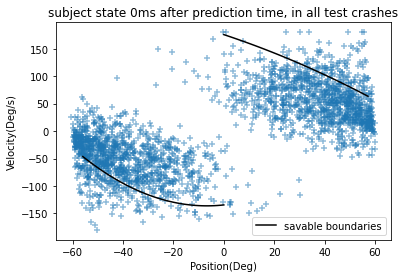

Total savable TP: 0.8070833333333334 (1937/2400)


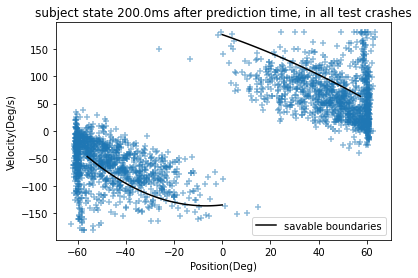

Total savable TP: 0.5541666666666667 (1330/2400)


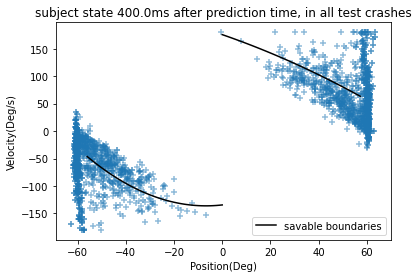

Total savable TP: 0.30291666666666667 (727/2400)


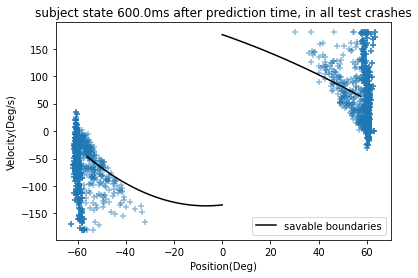

Total savable TP: 0.08541666666666667 (205/2400)


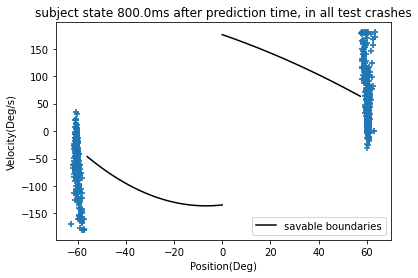

Total savable TP: 0.0 (0/2400)


In [68]:
savables = {}
for OFFSET in (0, 0.2, 0.4, 0.6, 0.8):
    vel_row_tup = pd.concat([fn, tp]).apply(lambda row: find_closest_vel_pos_in_row(row, offset=OFFSET), axis=1).to_list()
    vels, pos = zip(*vel_row_tup)

    import matplotlib.pyplot as plt
    to_vel = np.vectorize(savable_vel)
    lin_x1 = np.linspace(-61, -0.001)
    lin_y1 = to_vel(lin_x1)
    lin_x2 = np.linspace(0.001, 61)
    lin_y2 = to_vel(lin_x2)

    plt.plot(lin_x1, lin_y1, 'k-')
    plt.plot(lin_x2, lin_y2, 'k-', label="savable boundaries")

    plt.scatter(pos, vels, marker="+", alpha=0.5)
    plt.xlabel("Position(Deg)")
    plt.ylabel("Velocity(Deg/s)")
    plt.title(f"subject state {OFFSET*1000}ms after prediction time, in all test crashes")
    plt.legend(loc="lower right")

    # # plot unsavable positions
    # left_bound=max(pos_below_zero)
    # right_bound=min(pos_above_zero)
    # plt.axvline(x=left_bound+1, ymin=0.39, ymax=1, color="k")
    # plt.axvline(x=right_bound, ymin=0, ymax=0.655, color="k")

    plt.show()

    total_savables = sum([is_savable(pos, vel) for vel, pos in vel_row_tup])
    savables[OFFSET] = total_savables/len(vel_row_tup)
    print(f"Total savable TP: {total_savables/len(vel_row_tup)} ({total_savables}/{len(vel_row_tup)})")

In [69]:
savables

{0: 0.8070833333333334,
 0.2: 0.5541666666666667,
 0.4: 0.30291666666666667,
 0.6: 0.08541666666666667,
 0.8: 0.0}

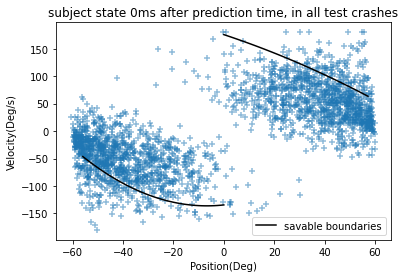

Total savable TP: 0.8070833333333334 (1937/2400)


In [77]:

OFFSET = 0
vel_row_tup = pd.concat([fn, tp]).apply(lambda row: find_closest_vel_pos_in_row(row, offset=OFFSET), axis=1).to_list()
vels, pos = zip(*vel_row_tup)

import matplotlib.pyplot as plt
to_vel = np.vectorize(savable_vel)
lin_x1 = np.linspace(-61, -0.001)
lin_y1 = to_vel(lin_x1)
lin_x2 = np.linspace(0.001, 61)
lin_y2 = to_vel(lin_x2)

plt.plot(lin_x1, lin_y1, 'k-')
plt.plot(lin_x2, lin_y2, 'k-', label="savable boundaries")

plt.scatter(pos, vels, marker="+", alpha=0.5)
plt.xlabel("Position(Deg)")
plt.ylabel("Velocity(Deg/s)")
plt.title(f"subject state {OFFSET*1000}ms after prediction time, in all test crashes")
plt.legend(loc="lower right")

# # plot unsavable positions
# left_bound=max(pos_below_zero)
# right_bound=min(pos_above_zero)
# plt.axvline(x=left_bound+1, ymin=0.39, ymax=1, color="k")
# plt.axvline(x=right_bound, ymin=0, ymax=0.655, color="k")

plt.savefig("fig10.pdf")
plt.show()

total_savables = sum([is_savable(pos, vel) for vel, pos in vel_row_tup])
print(f"Total savable TP: {total_savables/len(vel_row_tup)} ({total_savables}/{len(vel_row_tup)})")

## Model Prediction Time
Estimate how much time it will take the model to do an atomic prediction. 

Verdict: 
0.027334506230001807 ± 0.005069943421040469 on Apple M1 CPU. 

In [70]:
import time
import tensorflow as tf
from tensorflow import keras

In [71]:

model = tf.keras.models.load_model('model_data/exp623_1.0win_0.8ahead_conf3_gru-gru/model')


In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50, 100)           31800     
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [73]:
sample_input = tf.random.uniform((1,50,4), minval=-1, maxval=1)


In [74]:
elapsed = []
for _ in range(100):
    sample_input = tf.random.uniform((1,50,4), minval=-1, maxval=1)
    start = time.perf_counter()
    model.predict(sample_input)
    elapsed.append(time.perf_counter() - start)


In [75]:
import numpy as np
np.mean(elapsed), np.std(elapsed)

(0.02377008373005083, 0.03191010207233106)

# Other TODO

## Change the flow
Reorganizing (cut and paste section for Vivek's sections, move heading to "we...")

## Fleshing out..
### The deployement system
-	Model takes a 1000ms and predicts whether crash or not (atomic prediction time? )
In real time implementation, send 1000ms chunks to model at every \[human reaction time\]ms; if crash is eminent, expressed as a vibrotactile information to the person in an aircraft simulator. (Literature on Vibro-tactile interface) (anywhere < 30ms is cool)


## References
### Try 3 BibTex In LateX
* Does it work? 
* Can we copy-paste the bib?

Verdict: It works. I'd like to migrate our paper to LaTex. I'll meet with my cousin again to go over the technical issues.

### Other Miscellaneous
* Update citation order
* Update references section
* Put references in comment section into reference section

All these will be handled with LaTex.

